In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
import sys
import warnings
warnings.filterwarnings('ignore')
import time
from itertools import permutations, combinations, product, islice
import pandas as pd

In [2]:
## load
pprog_arr = pickle.load(open('data/df_gpn_pprog_arr', 'rb'))

# prep
source_0 = pd.read_pickle('data/df_gpn')['source'].values
df_gpn_0 = pd.read_pickle('data/df_gpn_pte')
df_gpn_0['source'] = source_0
df_gpn_0.to_csv('gephi/df_gpn_0.csv', index=False)
#
df_gpn_1 = pd.read_pickle('data/df_gpn_pte')
tar_list = df_gpn_1['target'].values.tolist()
#
srcs_1, tars_1 = df_gpn_1[['source','target']].values.T
ids_src_1 = np.array([tar_list.index(x) for x in srcs_1])
ids_tar_1 = np.array([tar_list.index(x) for x in tars_1])
#
srcs_0, tars_0 = df_gpn_0[['source','target']].values.T
ids_src_0 = np.array([tar_list.index(x) for x in srcs_0])
ids_tar_0 = np.array([tar_list.index(x) for x in tars_0])

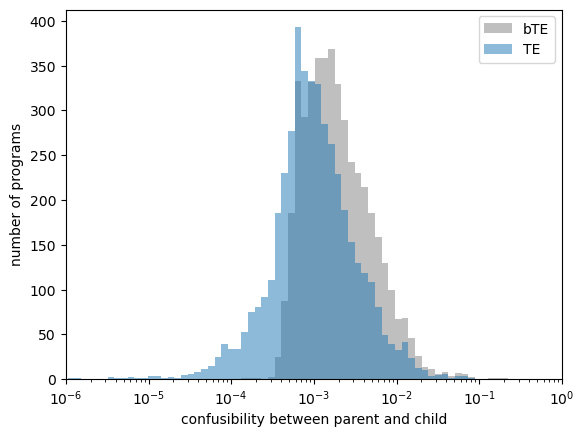

In [4]:
## plot
plt.hist(pprog_arr[ids_src_1,ids_tar_1,-1], bins=np.logspace(-8,0,100), alpha=.5, label='bTE', color='gray')
plt.hist(pprog_arr[ids_src_0,ids_tar_0,-1], bins=np.logspace(-8,0,100), alpha=.5, label='TE', color='tab:blue')
plt.xscale('log')
plt.xlabel('confusibility between parent and child')
plt.ylabel('number of programs')
plt.xlim([1e-6,1])
plt.legend()
plt.savefig('fig/resub_bte_vs_te_confusibility.pdf', dpi=300)

In [24]:
## gephi
'''
1) run below
2) open df_gpn_bte.gephi
3) clear the egdes
4) import spreadsheet: df_gpn_te.csv
5) rerun Yufan's layout
'''
df_bte = pd.read_pickle('data/df_gpn_pte')
df_te = pd.read_pickle('data/df_gpn')
df_te['fn_comm'] = df_bte['fn_comm'].values
df_te[['target', 'source', 'eR', 'eR_source', 'progsize', 'd2enumDB', 'id_unique', 'num_outedge', 'id', 'if_leaf', 'ecc', 'num_mut', 'fn_comm']].to_csv('gephi/df_gpn_te.csv', index=False)